In [14]:
import pandas as pd

# load all_fouls_advanced.pkl (dataframe) and and all_the_features.pkl (list)
# all_fouls_advanced_with_vaep = pd.read_pickle('all_fouls_advanced_with_vaep.pkl')
# all_fouls_advanced_with_vaep.set_index('id', inplace=True)
# all_the_features = pd.read_pickle('all_the_features.pkl')

In [19]:
# the last column in all_the_features and the 'id' column in all_fouls_advanced are the same. based on this, add a new element to each all_the_features that takes the 'vaep_offensive' column from all_fouls_advanced when the 'id' column matches. Remember all_the_features is just a list of lists. Also 'id' is all_fouls_advanced's index.
# for i in range(len(all_the_features)):
#     all_the_features[i].append(all_fouls_advanced.loc[all_the_features[i][-1], 'vaep_value_offensive'])

# print (all_the_features[0])

[14, 0, 37.96840792026972, 1.2823667682765016, 1, 1, '9221da02-9c87-4f98-a8ea-de9994ad562b', -0.00019568584684748203]


In [20]:
# Save all_the_features as a pickle file in file path: all_the_features_with_vaep.pkl
# import pickle
# with open('all_the_features_with_vaep.pkl', 'wb') as f:
#     pickle.dump(all_the_features, f)

In [24]:
import pandas as pd

# load all_fouls_advanced.pkl
all_fouls_advanced_with_vaep = pd.read_pickle('all_fouls_advanced_with_vaep.pkl')

# load model_lgbm_regressor.pkl
# model_lgbm_regressor = pd.read_pickle('model_lgbm_regressor.pkl')

# load model_lgbm_classifier.pkl
# model_lgbm_classifier = pd.read_pickle('model_lgbm_classifier.pkl')

# load all_the_features.pkl
all_the_features_with_vaep = pd.read_pickle('all_the_features_with_vaep.pkl')

# load all_the_labels.pkl
all_the_labels = pd.read_pickle('all_the_labels.pkl')


In [25]:
# convert all_the_features which is a list to a dataframe. The name of columns are: ['minutes', 'score_difference', 'distance_to_goal', 'angle_to_goal', 'foul_count_player', 'foul_count_team', 'vaep_offensive', 'id']
all_the_features_with_vaep = pd.DataFrame(all_the_features, columns=['minutes', 'score_difference', 'distance_to_goal', 'angle_to_goal', 'foul_count_player', 'foul_count_team', 'id', 'vaep_offensive'])

# set id as index
all_the_features_with_vaep.set_index('id', inplace=True)

In [26]:
all_the_features_with_vaep.head()

,minutes,score_difference,distance_to_goal,angle_to_goal,foul_count_player,foul_count_team,vaep_offensive
id,,,,,,,
9221da02-9c87-4f98-a8ea-de9994ad562b,14,0,37.968408,1.282367,1,1,-0.000196
f2bd21f6-87c3-44c0-bb37-04e996db413e,23,1,65.011153,0.058485,1,1,-0.001102
8e51baec-6948-4285-86a1-73197126e265,33,0,69.641654,-0.306311,1,2,-0.001255
b711f529-182e-4ae3-8c9a-189b7697b2ea,46,0,52.106142,-0.264064,1,2,-0.000879
ec46c71c-af4c-4d99-a854-e4ffc30460d6,55,1,42.569942,0.554117,1,3,-0.016189


In [28]:
all_fouls_advanced_with_vaep.set_index('id', inplace=True)

In [29]:
# Save all_the_features_with_vaep as a pickle file in file path: all_the_features_with_vaep_df.pkl
import pickle
with open('all_the_features_with_vaep_df.pkl', 'wb') as f:
    pickle.dump(all_the_features_with_vaep, f)

In [34]:
# Add column 'label' to all_the_features_with_vaep. The values of this column should be filled from all_the_labels which is a list of list, with each list element with one value only.
all_the_features_with_vaep['label'] = all_the_labels

# each label in all_the_features_with_vaep is a list with one element. convert it to a single value
all_the_features_with_vaep['label'] = all_the_features_with_vaep['label'].apply(lambda x: x[0])

all_the_features_with_vaep.head()

,minutes,score_difference,distance_to_goal,angle_to_goal,foul_count_player,foul_count_team,vaep_offensive,label
id,,,,,,,,
9221da02-9c87-4f98-a8ea-de9994ad562b,14,0,37.968408,1.282367,1,1,-0.000196,0
f2bd21f6-87c3-44c0-bb37-04e996db413e,23,1,65.011153,0.058485,1,1,-0.001102,2
8e51baec-6948-4285-86a1-73197126e265,33,0,69.641654,-0.306311,1,2,-0.001255,0
b711f529-182e-4ae3-8c9a-189b7697b2ea,46,0,52.106142,-0.264064,1,2,-0.000879,0
ec46c71c-af4c-4d99-a854-e4ffc30460d6,55,1,42.569942,0.554117,1,3,-0.016189,0


In [35]:
all_the_features_with_vaep['label'].value_counts()

2    763
0    559
1     11
Name: label, dtype: int64

In [ ]:
# 2: neither yellow nor red card nor second yellow card
# 1: red card
# 0: yellow card or second yellow card

In [38]:
# remove all rows with label = 1
all_the_features_with_vaep = all_the_features_with_vaep[all_the_features_with_vaep['label'] != 1]

# convert all labels with value 0 to 1
all_the_features_with_vaep['label'] = all_the_features_with_vaep['label'].apply(lambda x: 1 if x == 0 else x)

# convert all labels with value 2 to 0
all_the_features_with_vaep['label'] = all_the_features_with_vaep['label'].apply(lambda x: 0 if x == 2 else x)



In [39]:
all_the_features_with_vaep['label'].value_counts()

0    763
1    559
Name: label, dtype: int64

In [40]:

with open('features_with_label_df.pkl', 'wb') as f:
    pickle.dump(all_the_features_with_vaep, f)

In [47]:
import pickle
import pandas as pd

# load features_with_label_df.pkl
features_with_label_df = pd.read_pickle('features_with_label_df.pkl')

features_with_label_df.head()

,minutes,score_difference,distance_to_goal,angle_to_goal,foul_count_player,foul_count_team,vaep_offensive,label
id,,,,,,,,
9221da02-9c87-4f98-a8ea-de9994ad562b,14,0,37.968408,1.282367,1,1,-0.000196,1
f2bd21f6-87c3-44c0-bb37-04e996db413e,23,1,65.011153,0.058485,1,1,-0.001102,0
8e51baec-6948-4285-86a1-73197126e265,33,0,69.641654,-0.306311,1,2,-0.001255,1
b711f529-182e-4ae3-8c9a-189b7697b2ea,46,0,52.106142,-0.264064,1,2,-0.000879,1
ec46c71c-af4c-4d99-a854-e4ffc30460d6,55,1,42.569942,0.554117,1,3,-0.016189,1


In [44]:
# print value_counts but map it to 1 is yellow card, 0 is no card in label column
features_with_label_df['label'].value_counts()

0    763
1    559
Name: label, dtype: int64

In [45]:
features_with_label_df.columns

Index(['minutes', 'score_difference', 'distance_to_goal', 'angle_to_goal',
       'foul_count_player', 'foul_count_team', 'vaep_offensive', 'label'],
      dtype='object')

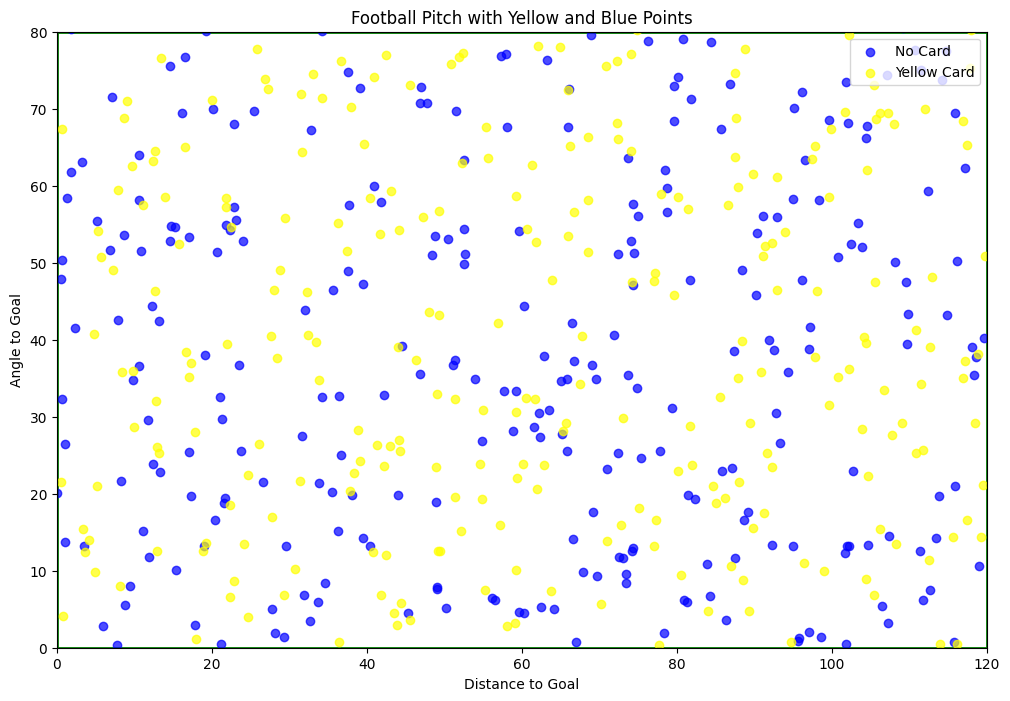

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data, replace this with your actual dataframe
# For this example, I'm using random data.
import random
data = {
    'distance_to_goal': [random.uniform(0, 120) for _ in range(600)],
    'angle_to_goal': [random.uniform(0, 90) for _ in range(600)],
    'label': [random.choice([0, 1]) for _ in range(600)]
}
features_with_label_df = pd.DataFrame(data)

# Define the football pitch dimensions
pitch_length = 120  # Adjust as needed
pitch_width = 80   # Adjust as needed

# Create a football pitch background
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, pitch_length)
ax.set_ylim(0, pitch_width)

# Plot the pitch elements
# You can customize the pitch elements as needed
# For simplicity, we're just plotting lines for the pitch boundaries
pitch_boundary = plt.Rectangle((0, 0), pitch_length, pitch_width, color='green', linewidth=2, fill=False)
ax.add_patch(pitch_boundary)

# Plot the points on the pitch based on label
label_0 = features_with_label_df[features_with_label_df['label'] == 0]
label_1 = features_with_label_df[features_with_label_df['label'] == 1]

# Plot the points
ax.scatter(label_0['distance_to_goal'], label_0['angle_to_goal'], color='blue', label='No Card', alpha=0.7)
ax.scatter(label_1['distance_to_goal'], label_1['angle_to_goal'], color='yellow', label='Yellow Card', alpha=0.7)

# Customize the plot (add legends, labels, etc.)
plt.legend(loc='upper right')
plt.title('Football Pitch with Yellow and Blue Points')
plt.xlabel('Distance to Goal')
plt.ylabel('Angle to Goal')

# Show the plot
plt.show()


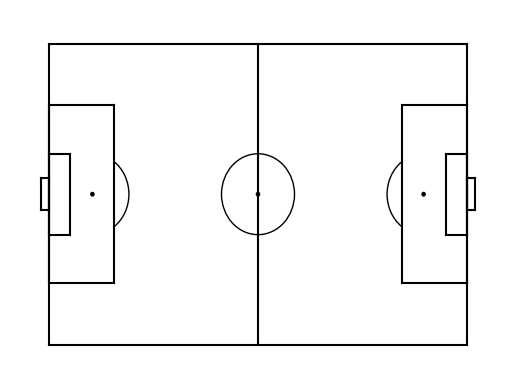

TypeError: cannot unpack non-iterable Axes object

In [55]:
# show range of values in distance_to_goal column and angle_to_goal column
features_with_label_df['distance_to_goal'].describe()

count    1322.000000
mean       63.619892
std        23.386890
min         7.683749
25%        46.493518
50%        63.844926
75%        79.734873
max       121.233700
Name: distance_to_goal, dtype: float64

In [56]:
features_with_label_df['angle_to_goal'].describe()

count    1322.000000
mean        0.003633
std         0.440976
min        -1.424607
25%        -0.307372
50%        -0.004394
75%         0.326947
max         1.474223
Name: angle_to_goal, dtype: float64

In [57]:
features_with_label_df.columns

Index(['minutes', 'score_difference', 'distance_to_goal', 'angle_to_goal',
       'foul_count_player', 'foul_count_team', 'vaep_offensive', 'label'],
      dtype='object')

In [ ]:
# the columns 'minutes', 'score_difference', 'distance_to_goal', 'angle_to_goal', 'foul_count_player', 'foul_count_team', 'vaep_offensive' are my features and the column 'label' is my label. The label is either 0 or 1. 0 means no card and 1 means yellow card. I want a model that gives probability of yellow card given the features. These columns are in the dataframe features_with_label_df. Split this df into 3 parts: ratio 0.7, 0.1, 0.2 for train, val and test. Use the most suitable model and show results.

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


In [59]:
# Assuming your dataframe is named features_with_label_df
X = features_with_label_df[['minutes', 'score_difference', 'distance_to_goal', 'angle_to_goal', 'foul_count_player', 'foul_count_team', 'vaep_offensive']]
y = features_with_label_df['label']

# Split the data into train, validation, and test sets with a 70-10-20 ratio
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)


In [60]:
# Create an XGBoost classifier
model = XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
# Predict probabilities on the validation set
y_val_pred_prob = model.predict_proba(X_val)[:, 1]

# Evaluate the model using ROC AUC score and accuracy
roc_auc = roc_auc_score(y_val, y_val_pred_prob)
accuracy = accuracy_score(y_val, (y_val_pred_prob > 0.5).astype(int))

print(f'Validation ROC AUC: {roc_auc}')
print(f'Validation Accuracy: {accuracy}')


Validation ROC AUC: 0.8325980392156863
Validation Accuracy: 0.7709923664122137


In [62]:
print(classification_report(y_val, (y_val_pred_prob > 0.5).astype(int)))


              precision    recall  f1-score   support

           0       0.81      0.81      0.81        80
           1       0.71      0.71      0.71        51

    accuracy                           0.77       131
   macro avg       0.76      0.76      0.76       131
weighted avg       0.77      0.77      0.77       131



In [63]:
# Make predictions on the test set
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set using ROC AUC score and accuracy
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)
accuracy_test = accuracy_score(y_test, (y_test_pred_prob > 0.5).astype(int))

print(f'Test ROC AUC: {roc_auc_test}')
print(f'Test Accuracy: {accuracy_test}')


Test ROC AUC: 0.8205489919473343
Test Accuracy: 0.7518796992481203


In [64]:
# Get feature importances from the trained XGBoost model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importance results
print(feature_importance_df)


             Feature  Importance
6     vaep_offensive    0.247641
1   score_difference    0.151027
2   distance_to_goal    0.131543
5    foul_count_team    0.123486
0            minutes    0.119548
4  foul_count_player    0.114931
3      angle_to_goal    0.111823


In [65]:
features_with_label_df['score_difference'].value_counts()

 0    800
-1    334
-2    131
-3     36
-4     10
 1      5
-6      3
-5      3
Name: score_difference, dtype: int64